# UK House Sales Analysis
This is an analysis of the "Price Paid Data" which explores the UK house sales dataset from 1995 to 2023.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('draft_cleaned_house_sales_data.csv')

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950906 entries, 0 to 28950905
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Sale_ID        object
 1   Price          int64 
 2   Sale_date      object
 3   Postcode       object
 4   Property_type  object
 5   New_property?  object
 6   Tenure         object
 7   House_number   object
 8   Flat_number    object
 9   Street         object
 10  Locality       object
 11  City           object
 12  District       object
 13  County         object
 14  PPD            object
 15  Record         object
dtypes: int64(1), object(15)
memory usage: 3.5+ GB


,Price
count,2.895091e+07
mean,2.222607e+05
std,9.000840e+05
min,1.000000e+00
25%,8.500000e+04
50%,1.500000e+05
75%,2.500000e+05
max,5.943000e+08


In [4]:
df['Sale_date'] = pd.to_datetime(df['Sale_date'])
df.Sale_date.max()

Timestamp('2024-02-29 00:00:00')

In [5]:
# Limit the range of entries to end of December 2023
df = df[df['Sale_date']<= '2023-12-31']
df.Sale_date.max()

Timestamp('2023-12-31 00:00:00')

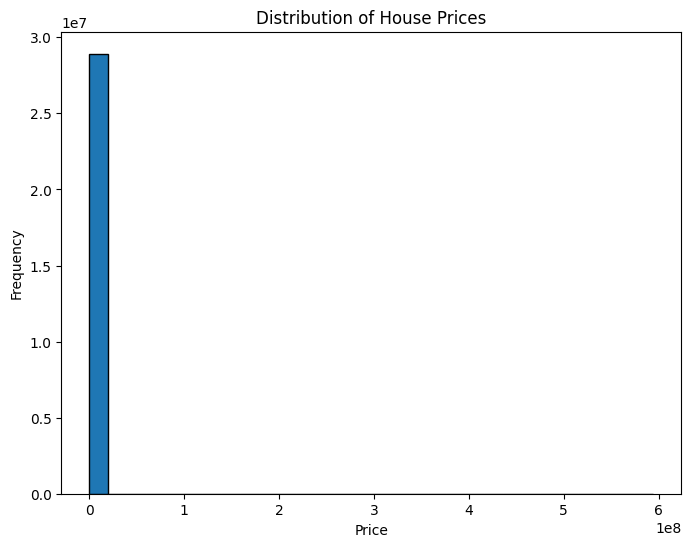

In [6]:
plt.figure(figsize=(8,6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


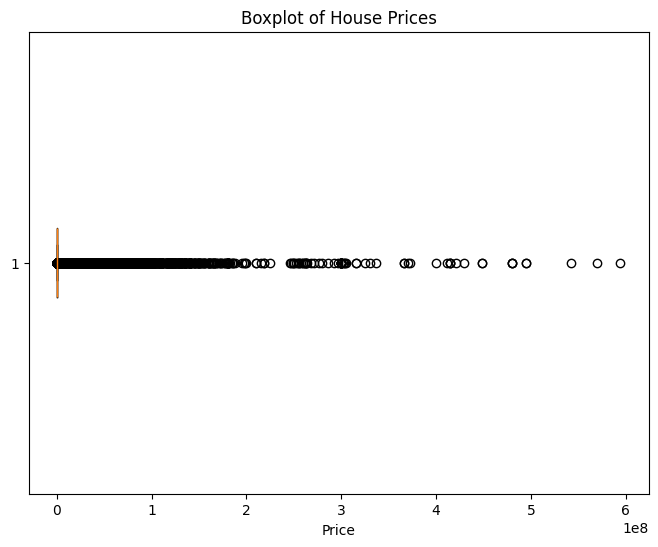

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Price'], vert=False)
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()

In [7]:
# Sort the df by descending price
df.sort_values(by='Price', ascending=False).head(10)

,Sale_ID,Price,Sale_date,Postcode,Property_type,New_property?,Tenure,House_number,Flat_number,Street,Locality,City,District,County,PPD,Record
23094205,{582D0637-EE28-8F22-E053-6C04A8C01BAC},594300000,2017-07-31,W1U 8EW,OTHER,N,LEASEHOLD,55,UNIT 53,BAKER STREET,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
23728211,{666758D7-A512-3363-E053-6B04A8C0D74E},569200000,2018-02-08,W1J 7BT,OTHER,N,FREEHOLD,2,NaN,STANHOPE ROW,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
24612855,{06C9F488-12CE-9388-E063-4804A8C0BD98},542540820,2019-11-20,NW5 2HB,OTHER,N,FREEHOLD,36,NaN,FORTESS ROAD,NaN,LONDON,CAMDEN,GREATER LONDON,B,A
24627818,{0B853950-EFE4-69A5-E063-4704A8C07DAC},494400000,2019-03-08,LS26 9DN,OTHER,N,FREEHOLD,3,NaN,NEWMARKET LANE,METHLEY,LEEDS,WAKEFIELD,WEST YORKSHIRE,B,A
24627820,{0B853950-EFE6-69A5-E063-4704A8C07DAC},494400000,2019-03-08,LS26 9DN,OTHER,N,FREEHOLD,3,NaN,NEWMARKET LANE,METHLEY,LEEDS,WAKEFIELD,WEST YORKSHIRE,B,A
28144285,{1061746E-EF79-3C34-E063-4804A8C0F9E7},480000000,2022-09-21,WV2 2JL,OTHER,N,FREEHOLD,MONMORE HOUSE,NaN,COOPER STREET,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,B,A
28157211,{1061746E-E127-3C34-E063-4804A8C0F9E7},480000000,2022-09-29,WV2 2JH,OTHER,N,FREEHOLD,SUTHERLAND HOUSE,NaN,SUTHERLAND AVENUE,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,B,A
28159964,{1061746E-E221-3C34-E063-4804A8C0F9E7},480000000,2022-09-21,WV2 2JQ,OTHER,N,FREEHOLD,SUTHERLAND SAW MILLS,NaN,SUTHERLAND AVENUE,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,B,A
23366683,{7E86B6FB-BF88-458C-E053-6B04A8C0C84C},448500000,2018-09-21,SE1 9JZ,OTHER,N,FREEHOLD,22,NaN,SUMNER STREET,NaN,LONDON,SOUTHWARK,GREATER LONDON,B,A
23636387,{773788C3-A146-2CE4-E053-6C04A8C05E57},448300979,2018-08-17,NE6 1AS,OTHER,N,LEASEHOLD,UNIT 8,NaN,HAWICK CRESCENT INDUSTRIAL ESTATE,NaN,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,B,A


It looks like there are a few outliers where the price is very high. These are most likely caused by many properties which fall under property type 'OTHER'. These are entire buidlings, offices or other properties which we are not interested in. We will focus only on residential properties.

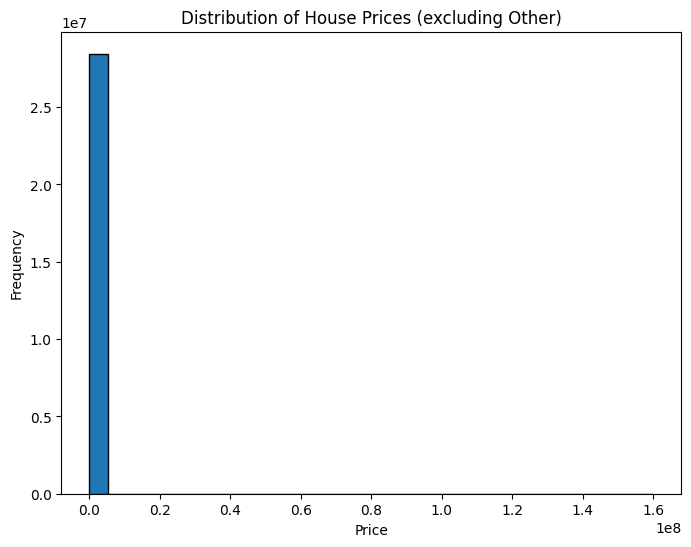

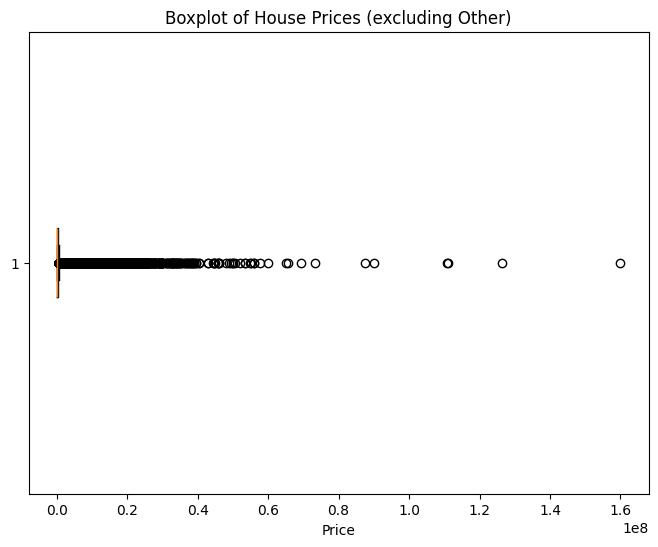

In [8]:
# Filter rows where Property_type is not 'Other'
df_residential = df[df['Property_type'] != 'OTHER']

# Histogram
plt.figure(figsize=(8,6))
plt.hist(df_residential['Price'], bins=30, edgecolor='black')
plt.title('Distribution of House Prices (excluding Other)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df_residential['Price'], vert=False)
plt.title('Boxplot of House Prices (excluding Other)')
plt.xlabel('Price')
plt.show()


It looks like there are still some outliers. This is most likely due to potential errors or very expensive properties in London. Before looking into it we will filter for properties which are not in London to see if we have the same results.

In [9]:
# Check the first 10 most expensive
df_residential.sort_values(by='Price', ascending=False).head(10)

,Sale_ID,Price,Sale_date,Postcode,Property_type,New_property?,Tenure,House_number,Flat_number,Street,Locality,City,District,County,PPD,Record
23526200,{726BF13B-B4D7-0A46-E053-6C04A8C01D0D},160000000,2018-05-10,SW1X 7LJ,FLAT,N,LEASEHOLD,"ONE HYDE PARK, 100",APARTMENT B.10.01,KNIGHTSBRIDGE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
28517522,{12A8BAB6-8F48-2125-E063-4804A8C08CC1},126500000,2023-10-27,SW11 3HN,TERRACED,N,FREEHOLD,4,NaN,SIMPSON STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A
26695482,{C8A3A576-F857-0425-E053-6C04A8C0947B},111000000,2021-04-06,SW1X 7LJ,FLAT,N,LEASEHOLD,"ONE HYDE PARK, 100",APARTMENT D.10.01,KNIGHTSBRIDGE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
25288853,{D93B27B1-BB92-3100-E053-6C04A8C08887},110900000,2020-10-16,W1K 4BN,FLAT,Y,LEASEHOLD,1,APARTMENT 6.2,GROSVENOR SQUARE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
22594161,{4E95D757-A753-EDA1-E050-A8C0630539E2},90000000,2017-04-07,SW7 1RH,FLAT,N,LEASEHOLD,"THE KNIGHTSBRIDGE APARTMENTS, 199",APARTMENT 1101,KNIGHTSBRIDGE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A
26253063,{1061746E-B9D7-3C34-E063-4804A8C0F9E7},87500000,2021-11-09,SW1W 8BW,FLAT,Y,LEASEHOLD,8,FLAT 37,WHISTLER SQUARE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
28559865,{0E082197-6253-5C09-E063-4704A8C0A10E},73200000,2023-03-06,SW3 5BY,TERRACED,Y,FREEHOLD,42,NaN,OLD CHURCH STREET,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B,A
24122651,{6B32222D-00E7-01F1-E053-6C04A8C0D2C8},69189235,2018-03-31,W1S 4EF,TERRACED,N,FREEHOLD,4,NaN,GRAFTON STREET,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
28286753,{FD226036-7C2A-4CB7-E053-4804A8C00430},65670000,2022-08-18,W1K 4BN,FLAT,N,LEASEHOLD,1,THE AMBASSADORS RESIDENCE,GROSVENOR SQUARE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
28665677,{12A8BAB6-E3BA-2125-E063-4804A8C08CC1},65000000,2023-11-01,SW5 0LP,DETACHED,N,FREEHOLD,3,NaN,BOLTONS PLACE,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B,A


Looking at the first 10 rows we can see expensive residential properties which is not a surprise given London's real estate market. 

Nonethelss, quickly going through the rows we can see that there is an error in the price of a property i.e. the terraced hose in 'WANDSWORTH'.

It is unusual that a property is that expensive in that area, furthermore, checking quickly online we have confirmation of this assumption. https://www.rightmove.co.uk/house-prices/details/england-135282506-20267272?s=d8a2aa0b06d0494fa4aa1a391a239d3d5624b028382597627c27faba76ff4c7f#/

In [10]:
# Changing wrong price
sale_id = '{12A8BAB6-8F48-2125-E063-4804A8C08CC1}'
new_price = 1265000
df_residential.loc[df_residential['Sale_ID'] == sale_id, 'Price'] = new_price

In [11]:
# Check the first 10 most expensive
df_residential.sort_values(by='Price', ascending=False).head(10)

,Sale_ID,Price,Sale_date,Postcode,Property_type,New_property?,Tenure,House_number,Flat_number,Street,Locality,City,District,County,PPD,Record
23526200,{726BF13B-B4D7-0A46-E053-6C04A8C01D0D},160000000,2018-05-10,SW1X 7LJ,FLAT,N,LEASEHOLD,"ONE HYDE PARK, 100",APARTMENT B.10.01,KNIGHTSBRIDGE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
26695482,{C8A3A576-F857-0425-E053-6C04A8C0947B},111000000,2021-04-06,SW1X 7LJ,FLAT,N,LEASEHOLD,"ONE HYDE PARK, 100",APARTMENT D.10.01,KNIGHTSBRIDGE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
25288853,{D93B27B1-BB92-3100-E053-6C04A8C08887},110900000,2020-10-16,W1K 4BN,FLAT,Y,LEASEHOLD,1,APARTMENT 6.2,GROSVENOR SQUARE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
22594161,{4E95D757-A753-EDA1-E050-A8C0630539E2},90000000,2017-04-07,SW7 1RH,FLAT,N,LEASEHOLD,"THE KNIGHTSBRIDGE APARTMENTS, 199",APARTMENT 1101,KNIGHTSBRIDGE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A
26253063,{1061746E-B9D7-3C34-E063-4804A8C0F9E7},87500000,2021-11-09,SW1W 8BW,FLAT,Y,LEASEHOLD,8,FLAT 37,WHISTLER SQUARE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
28559865,{0E082197-6253-5C09-E063-4704A8C0A10E},73200000,2023-03-06,SW3 5BY,TERRACED,Y,FREEHOLD,42,NaN,OLD CHURCH STREET,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B,A
24122651,{6B32222D-00E7-01F1-E053-6C04A8C0D2C8},69189235,2018-03-31,W1S 4EF,TERRACED,N,FREEHOLD,4,NaN,GRAFTON STREET,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
28286753,{FD226036-7C2A-4CB7-E053-4804A8C00430},65670000,2022-08-18,W1K 4BN,FLAT,N,LEASEHOLD,1,THE AMBASSADORS RESIDENCE,GROSVENOR SQUARE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A
28665677,{12A8BAB6-E3BA-2125-E063-4804A8C08CC1},65000000,2023-11-01,SW5 0LP,DETACHED,N,FREEHOLD,3,NaN,BOLTONS PLACE,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B,A
27845652,{E7B085FD-220A-7E31-E053-6C04A8C0E67F},60000000,2022-05-25,W1K 1AH,FLAT,Y,LEASEHOLD,5,APARTMENT 6.01,STANHOPE GATE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A


The analysis will differentiate between 'London' and 'Outside of London' to analyse different aspects like type of tenure, type of property and some analysis conducted on the price.

In [12]:
# This data frame will consider only London residential properties
residential_london = df_residential[df_residential['County'] == 'GREATER LONDON']

# This data frame will consider UK residential properties, excluding London
residential_uk = df_residential[df_residential['County'] != 'GREATER LONDON']

We look into the price distribution of the non London properties.

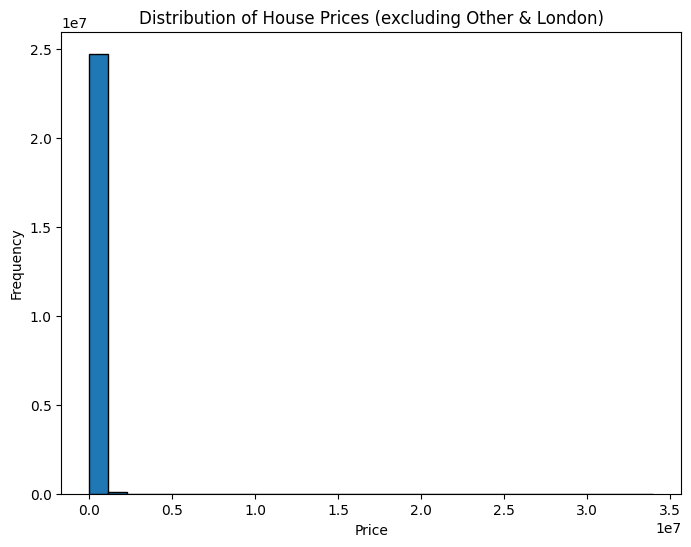

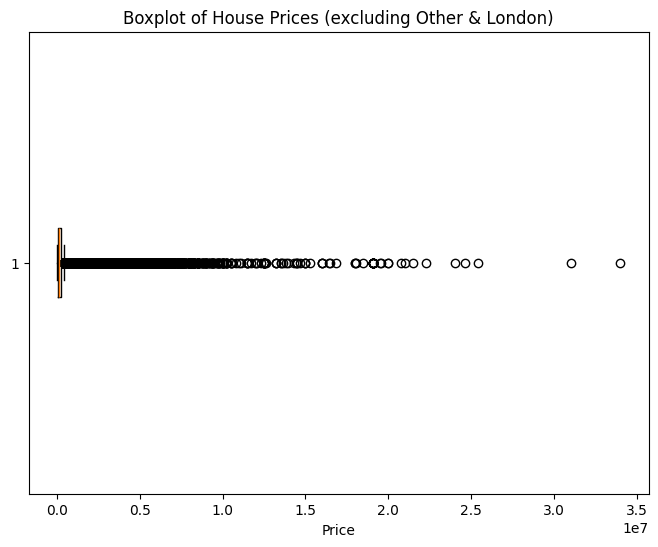

In [13]:

# Histogram
plt.figure(figsize=(8,6))
plt.hist(residential_uk['Price'], bins=30, edgecolor='black')
plt.title('Distribution of House Prices (excluding Other & London)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8,6))
plt.boxplot(residential_uk['Price'], vert=False)
plt.title('Boxplot of House Prices (excluding Other & London)')
plt.xlabel('Price')
plt.show()


In [14]:
# Top 10 most expensive
residential_uk.sort_values(by='Price', ascending=False).head(10)

,Sale_ID,Price,Sale_date,Postcode,Property_type,New_property?,Tenure,House_number,Flat_number,Street,Locality,City,District,County,PPD,Record
28614058,{01EB45F0-A033-40F3-E063-4704A8C05FDE},34000000,2023-05-25,TW20 0YD,DETACHED,N,FREEHOLD,WENTWORTH COURT,NaN,RIDGEMEAD ROAD,ENGLEFIELD GREEN,EGHAM,RUNNYMEDE,SURREY,B,A
27285504,{D707E536-9377-0AD9-E053-6B04A8C067CC},31000000,2021-12-24,GU25 4NE,DETACHED,N,FREEHOLD,RAVEN MORROW,NaN,WEST DRIVE,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,B,A
19801134,{21E5FEB6-DA82-2439-E050-A8C06205342E},25400000,2014-11-13,GU25 4JU,DETACHED,N,FREEHOLD,HOWICKS,NaN,HEATHERSIDE DRIVE,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,B,A
26453459,{D707E535-FA19-0AD9-E053-6B04A8C067CC},24600000,2021-12-03,GU8 6LJ,DETACHED,N,FREEHOLD,WESTBROOK HOUSE,NaN,WESTBROOK HILL,ELSTEAD,GODALMING,WAVERLEY,SURREY,A,A
28264221,{09266DDC-1860-AF90-E063-4704A8C02087},24000000,2022-06-10,GU25 4PZ,DETACHED,N,FREEHOLD,LONGWOOD,NaN,WAVERLEY DRIVE,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A
26715466,{F5E8B082-2669-3A13-E053-6C04A8C060B7},22301781,2021-12-17,WA5 4JY,SEMI-DETACHED,N,FREEHOLD,1,NaN,EXMOUTH WAY,BURTONWOOD,WARRINGTON,WARRINGTON,WARRINGTON,B,A
3033694,{2A289EA0-E672-CDC8-E050-A8C063054829},21500000,1998-08-20,PE30 1BJ,TERRACED,N,FREEHOLD,45,NaN,HIGH STREET,NaN,KING'S LYNN,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
22201243,{5A9D8B54-C2DA-68EB-E053-6B04A8C0D293},21000000,2017-08-02,SL5 0JB,DETACHED,N,FREEHOLD,LAMBOURN HALL,NaN,TITLARKS HILL,NaN,ASCOT,WINDSOR AND MAIDENHEAD,WINDSOR AND MAIDENHEAD,A,A
28849540,{F5E8B081-CD14-3A13-E053-6C04A8C060B7},20750000,2023-01-09,GU25 4NH,DETACHED,N,FREEHOLD,CHESHAM PLACE,NaN,MEADOW ROAD,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A
27081383,{C6209F5F-C4F3-295E-E053-6C04A8C0DDCC},20000000,2021-03-26,GU10 2QQ,DETACHED,N,FREEHOLD,WISHANGER MANOR,NaN,FRENSHAM LANE,CHURT,FARNHAM,EAST HAMPSHIRE,HAMPSHIRE,A,A


It looks like even if London properties are left out, there will still be big prices. Going briefly thorugh the first 10 rows we can spot another error which is the flat in EPPING FOREST.

In [15]:
# Change wrong price
uk_sale_id = '{1061746D-EE88-3C34-E063-4804A8C0F9E7}'
new_price_uk = 240000
residential_uk.loc[residential_uk['Sale_ID'] == uk_sale_id, 'Price'] = new_price_uk

In [16]:
# Top 10 most expensive
residential_uk.sort_values(by='Price', ascending=False).head(10)

,Sale_ID,Price,Sale_date,Postcode,Property_type,New_property?,Tenure,House_number,Flat_number,Street,Locality,City,District,County,PPD,Record
28614058,{01EB45F0-A033-40F3-E063-4704A8C05FDE},34000000,2023-05-25,TW20 0YD,DETACHED,N,FREEHOLD,WENTWORTH COURT,NaN,RIDGEMEAD ROAD,ENGLEFIELD GREEN,EGHAM,RUNNYMEDE,SURREY,B,A
27285504,{D707E536-9377-0AD9-E053-6B04A8C067CC},31000000,2021-12-24,GU25 4NE,DETACHED,N,FREEHOLD,RAVEN MORROW,NaN,WEST DRIVE,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,B,A
19801134,{21E5FEB6-DA82-2439-E050-A8C06205342E},25400000,2014-11-13,GU25 4JU,DETACHED,N,FREEHOLD,HOWICKS,NaN,HEATHERSIDE DRIVE,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,B,A
26453459,{D707E535-FA19-0AD9-E053-6B04A8C067CC},24600000,2021-12-03,GU8 6LJ,DETACHED,N,FREEHOLD,WESTBROOK HOUSE,NaN,WESTBROOK HILL,ELSTEAD,GODALMING,WAVERLEY,SURREY,A,A
28264221,{09266DDC-1860-AF90-E063-4704A8C02087},24000000,2022-06-10,GU25 4PZ,DETACHED,N,FREEHOLD,LONGWOOD,NaN,WAVERLEY DRIVE,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A
26715466,{F5E8B082-2669-3A13-E053-6C04A8C060B7},22301781,2021-12-17,WA5 4JY,SEMI-DETACHED,N,FREEHOLD,1,NaN,EXMOUTH WAY,BURTONWOOD,WARRINGTON,WARRINGTON,WARRINGTON,B,A
3033694,{2A289EA0-E672-CDC8-E050-A8C063054829},21500000,1998-08-20,PE30 1BJ,TERRACED,N,FREEHOLD,45,NaN,HIGH STREET,NaN,KING'S LYNN,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
22201243,{5A9D8B54-C2DA-68EB-E053-6B04A8C0D293},21000000,2017-08-02,SL5 0JB,DETACHED,N,FREEHOLD,LAMBOURN HALL,NaN,TITLARKS HILL,NaN,ASCOT,WINDSOR AND MAIDENHEAD,WINDSOR AND MAIDENHEAD,A,A
28849540,{F5E8B081-CD14-3A13-E053-6C04A8C060B7},20750000,2023-01-09,GU25 4NH,DETACHED,N,FREEHOLD,CHESHAM PLACE,NaN,MEADOW ROAD,NaN,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A
27081383,{C6209F5F-C4F3-295E-E053-6C04A8C0DDCC},20000000,2021-03-26,GU10 2QQ,DETACHED,N,FREEHOLD,WISHANGER MANOR,NaN,FRENSHAM LANE,CHURT,FARNHAM,EAST HAMPSHIRE,HAMPSHIRE,A,A


For the first part of our analysis we want to check some general info like type of properties, and type of tenure. Because this file contains transactions data we will have to remove the duplicates.

In [17]:
residential_uk['Property_type'].value_counts()

Property_type
TERRACED         7599694
SEMI-DETACHED    7367356
DETACHED         6511416
FLAT             3340028
Name: count, dtype: int64

In [ ]:
# Check for duplicates based on location UK
residential_uk.duplicated(subset=['Postcode', 'House_number', 'Flat_number', 'Street', 'Locality', 'City', 'District', 'County']).sum()

8606900

In [19]:
# Check for duplicates based on location London
residential_london.duplicated(subset=['Postcode', 'House_number', 'Flat_number', 'Street', 'Locality', 'City', 'District', 'County']).sum()

1063335

In [20]:
# Drop duplicates UK
unique_residential_uk = residential_uk.drop_duplicates(subset=['Postcode', 'House_number', 'Flat_number', 'Street', 'Locality', 'City', 'District', 'County'])
# Drop duplicates London
unique_residential_london = residential_london.drop_duplicates(subset=['Postcode', 'House_number', 'Flat_number', 'Street', 'Locality', 'City', 'District', 'County'])

In [21]:
# Percentage of property type UK
property_uk_counts = unique_residential_uk['Property_type'].value_counts()
property_uk_percentage = (property_uk_counts / property_uk_counts.sum()) * 100

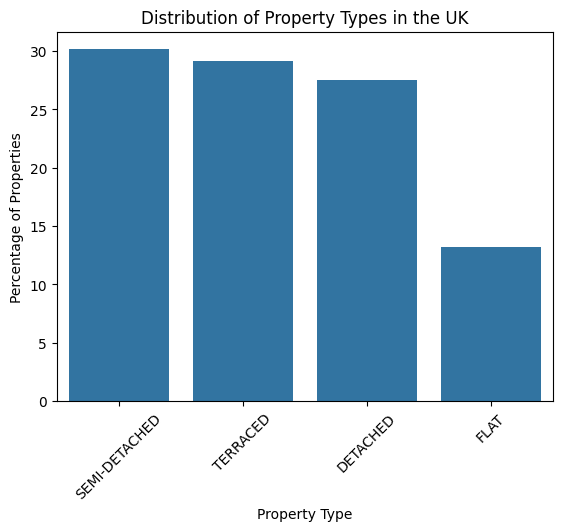

In [22]:
sns.barplot(x=property_uk_percentage.index, y=property_uk_percentage.values)
plt.title('Distribution of Property Types in the UK')
plt.xlabel('Property Type')
plt.ylabel('Percentage of Properties')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Percentage of property tenure UK
tenure_uk_counts = unique_residential_uk['Tenure'].value_counts()
tenure_uk_percentage = (tenure_uk_counts / tenure_uk_counts.sum()) * 100

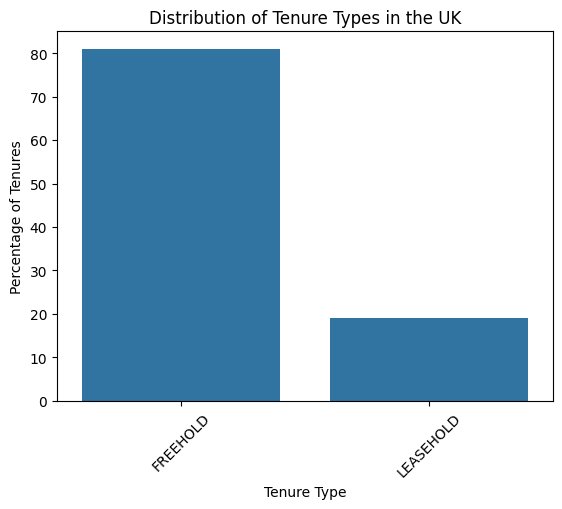

In [26]:
sns.barplot(x=tenure_uk_percentage.index, y=tenure_uk_percentage.values)
plt.title('Distribution of Tenure Types in the UK')
plt.xlabel('Tenure Type')
plt.ylabel('Percentage of Tenures')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Group by Property_type and use value_counts on Tenure with normalize=True
property_tenure_uk_percentage = unique_residential_uk.groupby('Property_type')['Tenure'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

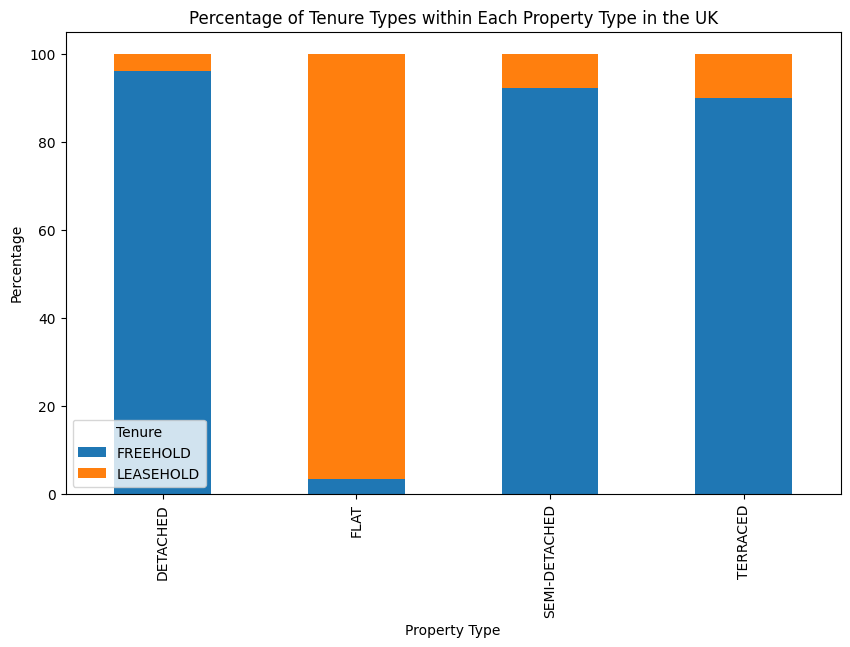

In [30]:
# Pivot the data to prepare it for a stacked bar chart
pivot_data = property_tenure_uk_percentage.pivot(index='Property_type', columns='Tenure', values='Percentage')
# Plot a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
# Add labels and title
plt.xlabel('Property Type')
plt.ylabel('Percentage')
plt.title('Percentage of Tenure Types within Each Property Type in the UK')
plt.legend(title='Tenure')
plt.show()

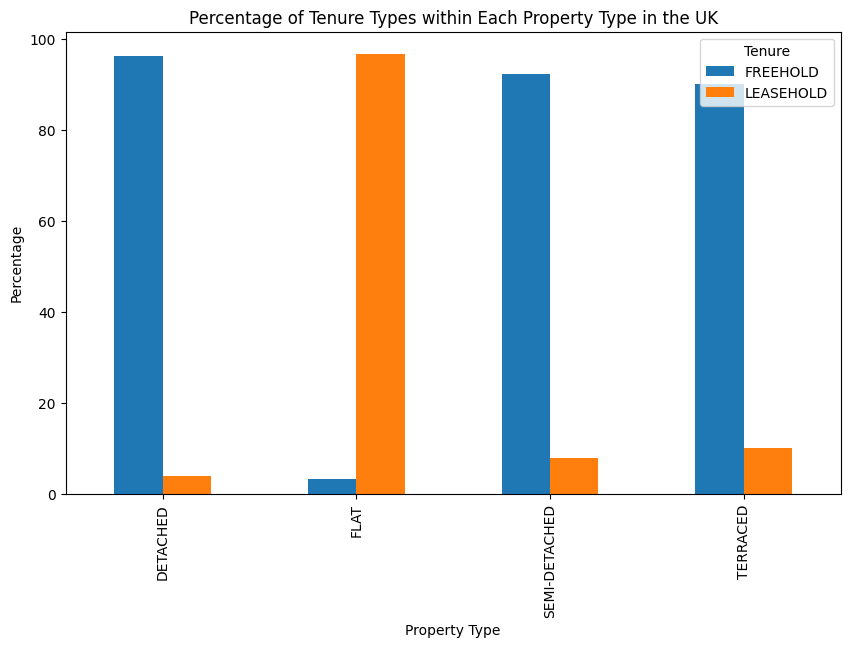

In [31]:
# Pivot the data to prepare it for a grouped bar plot
pivot_data = property_tenure_uk_percentage.pivot(index='Property_type', columns='Tenure', values='Percentage')

# Plot the grouped bar chart
pivot_data.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Property Type')
plt.ylabel('Percentage')
plt.title('Percentage of Tenure Types within Each Property Type in the UK')
plt.legend(title='Tenure')
plt.show()


In [23]:
# Percentage of property type London
property_london_counts = unique_residential_london['Property_type'].value_counts()
property_london_percentage = (property_london_counts / property_london_counts.sum()) * 100

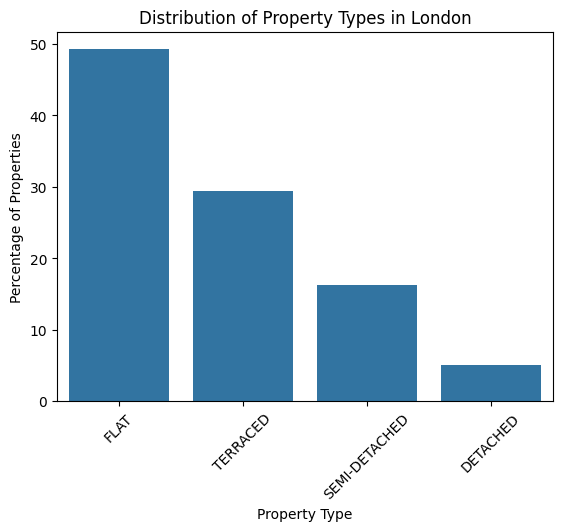

In [24]:
sns.barplot(x=property_london_percentage.index, y=property_london_percentage.values)
plt.title('Distribution of Property Types in London')
plt.xlabel('Property Type')
plt.ylabel('Percentage of Properties')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Percentage of property tenure London
tenure_london_counts = unique_residential_london['Tenure'].value_counts()
tenure_london_percentage = (tenure_london_counts / tenure_london_counts.sum()) * 100

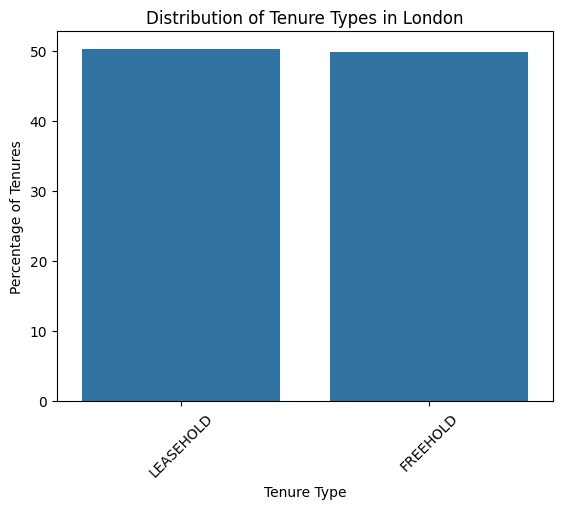

In [28]:
sns.barplot(x=tenure_london_percentage.index, y=tenure_london_percentage.values)
plt.title('Distribution of Tenure Types in London')
plt.xlabel('Tenure Type')
plt.ylabel('Percentage of Tenures')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Group by Property_type and calculate percentage of Tenure using value_counts with normalize=True
property_tenure_london_percentage = unique_residential_london.groupby('Property_type')['Tenure'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

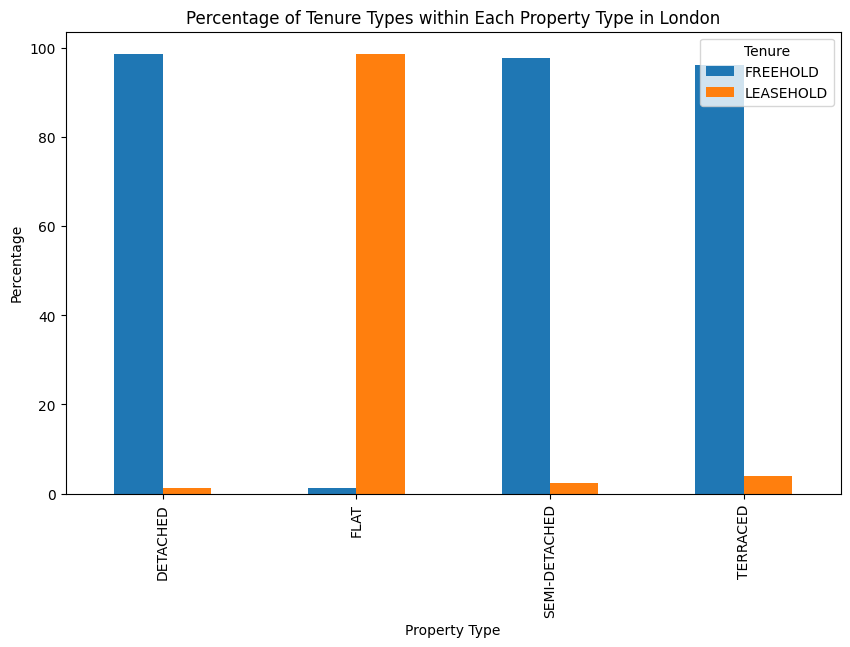

In [33]:
# Pivot the data for grouped bar plot
pivot_data_london = property_tenure_london_percentage.pivot(index='Property_type', columns='Tenure', values='Percentage')
# Plot grouped bar chart
pivot_data_london.plot(kind='bar', figsize=(10, 6))
# Customize the plot
plt.xlabel('Property Type')
plt.ylabel('Percentage')
plt.title('Percentage of Tenure Types within Each Property Type in London')
plt.legend(title='Tenure')
plt.show()

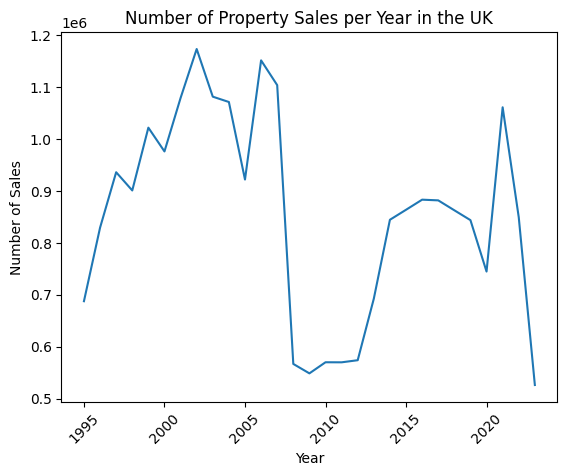

In [35]:
# Extract the year from the Sale_date column using .loc
residential_uk.loc[:, 'Year'] = residential_uk['Sale_date'].dt.year

# Drop rows with NaT in Sale_date if necessary
residential_uk = residential_uk.dropna(subset=['Year'])

# Group by Year and count the number of sales
sales_per_year_uk = residential_uk.groupby('Year').size()

# Plot the number of sales per year
sns.lineplot(x=sales_per_year_uk.index, y=sales_per_year_uk.values)
plt.title('Number of Property Sales per Year in the UK')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

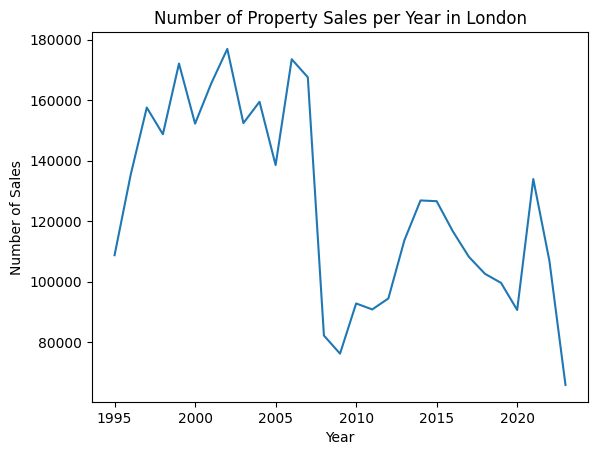

In [37]:
# Extract the year from the Sale_date column
residential_london.loc[:, 'Year'] = residential_london['Sale_date'].dt.year

# Group by Year and count the number of sales
sales_per_year_london = residential_london.groupby('Year').size()

# Plot the number of sales per year
sns.lineplot(x=sales_per_year_london.index, y=sales_per_year_london.values)
plt.title('Number of Property Sales per Year in London')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

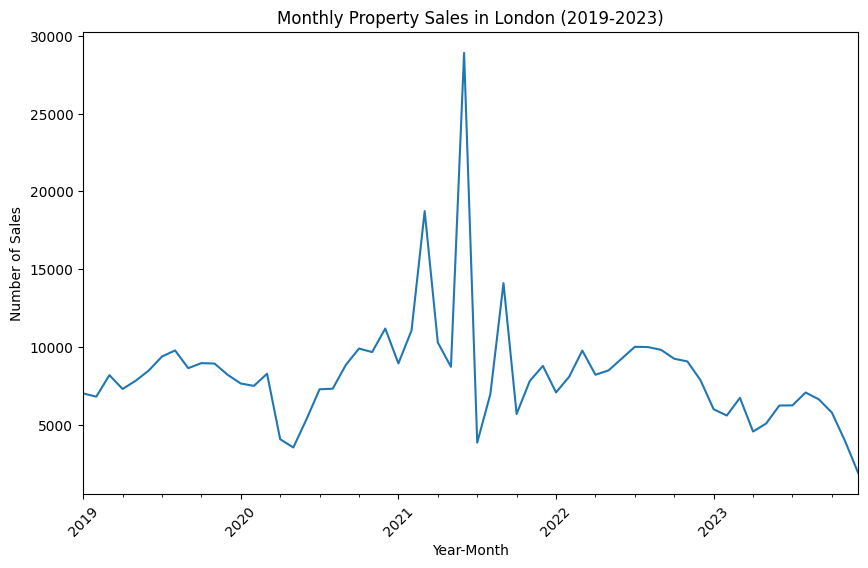

In [41]:

# Focus on the years 2019 to 2023
london_covid_period = residential_london[residential_london['Sale_date'].dt.year >= 2019].copy()

# Extract year and month
london_covid_period['YearMonth'] = london_covid_period['Sale_date'].dt.to_period('M')

# Group by Year Month and count the number of sales
sales_per_month_london = london_covid_period.groupby('YearMonth').size()

# Plot the number of sales per month in London
sales_per_month_london.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Property Sales in London (2019-2023)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


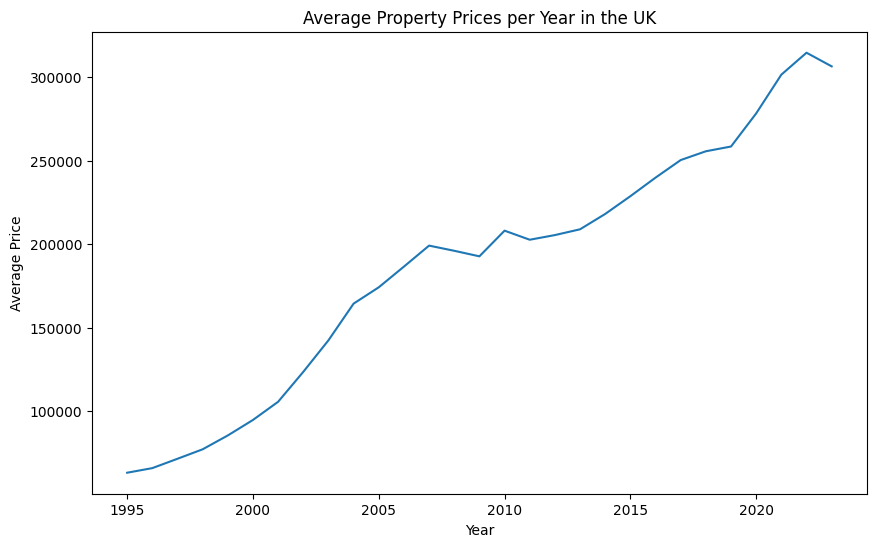

In [42]:
# Group by Year and calculate the average price for each year
average_price_per_year_uk = residential_uk.groupby('Year')['Price'].mean()

# Plot the average price per year
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_per_year_uk.index, y=average_price_per_year_uk.values)
plt.title('Average Property Prices per Year in the UK')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

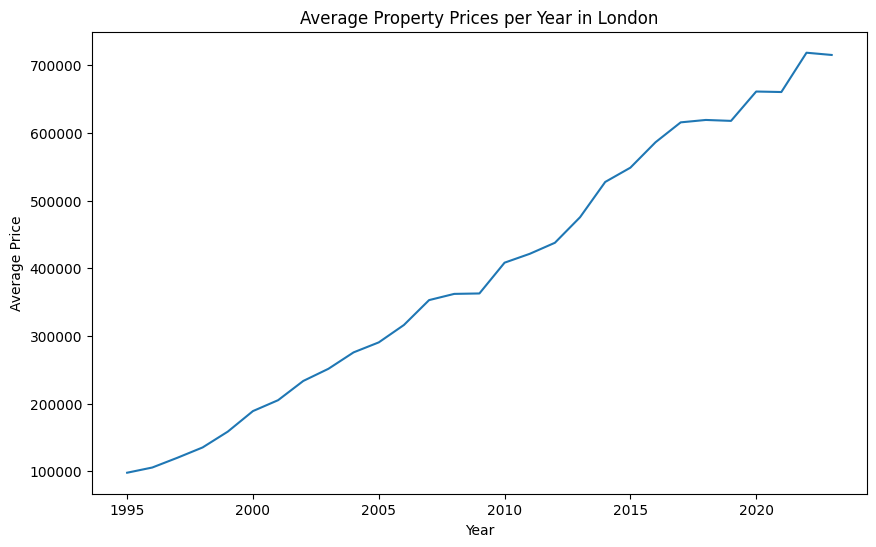

In [43]:
# Group by Year and calculate the average price for each year in London
average_price_per_year_london = residential_london.groupby('Year')['Price'].mean()

# Plot the average price per year in London
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_per_year_london.index, y=average_price_per_year_london.values)
plt.title('Average Property Prices per Year in London')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

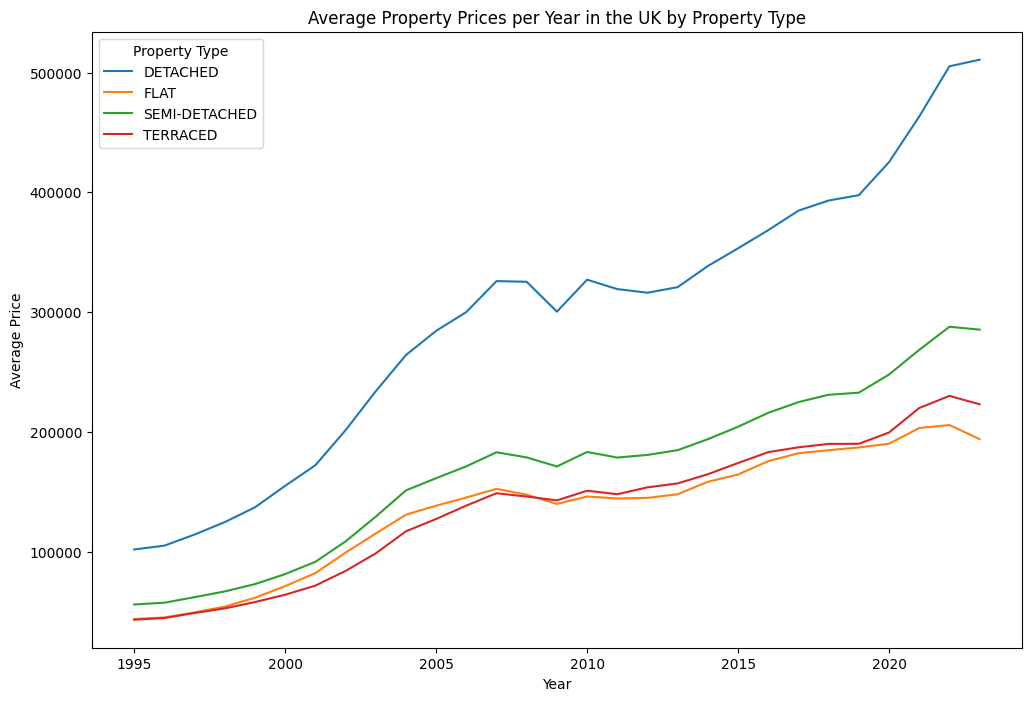

In [44]:
# Group by Year and Property_type, and calculate the average price for each group
property_average_price_per_year_uk = residential_uk.groupby(['Year', 'Property_type'])['Price'].mean().unstack()

# Plot the average price per year based on property type
plt.figure(figsize=(12, 8))
property_average_price_per_year_uk.plot(kind='line', ax=plt.gca())
plt.title('Average Property Prices per Year in the UK by Property Type')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Property Type')
plt.show()

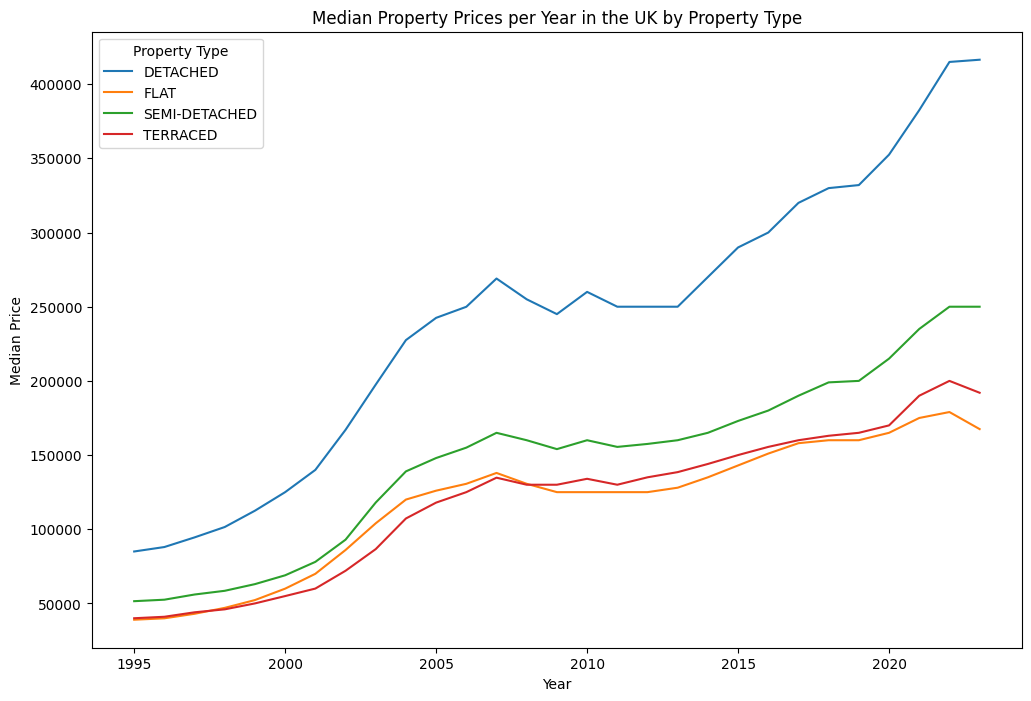

In [45]:
# Group by Year and Property_type, and calculate the average price for each group
property_median_price_per_year_uk = residential_uk.groupby(['Year', 'Property_type'])['Price'].median().unstack()

# Plot the average price per year based on property type
plt.figure(figsize=(12, 8))
property_median_price_per_year_uk.plot(kind='line', ax=plt.gca())
plt.title('Median Property Prices per Year in the UK by Property Type')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.legend(title='Property Type')
plt.show()

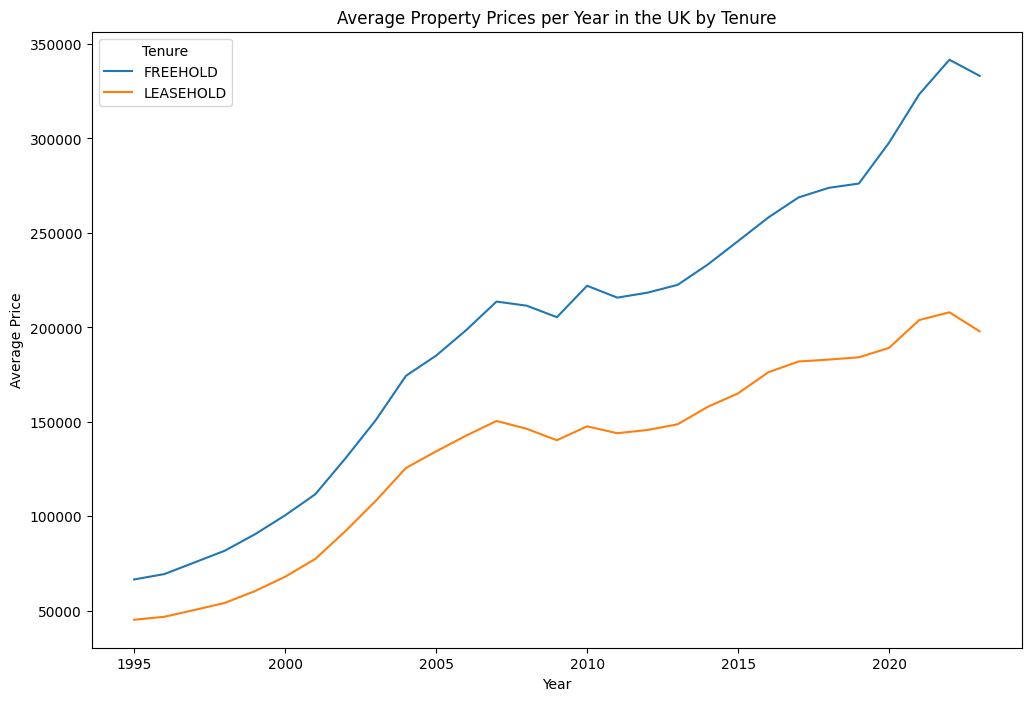

In [46]:
# Group by Year and Property_type, and calculate the average price for each group
tenure_average_price_per_year_uk = residential_uk.groupby(['Year', 'Tenure'])['Price'].mean().unstack()

# Plot the average price per year based on property type
plt.figure(figsize=(12, 8))
tenure_average_price_per_year_uk.plot(kind='line', ax=plt.gca())
plt.title('Average Property Prices per Year in the UK by Tenure')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Tenure')
plt.show()

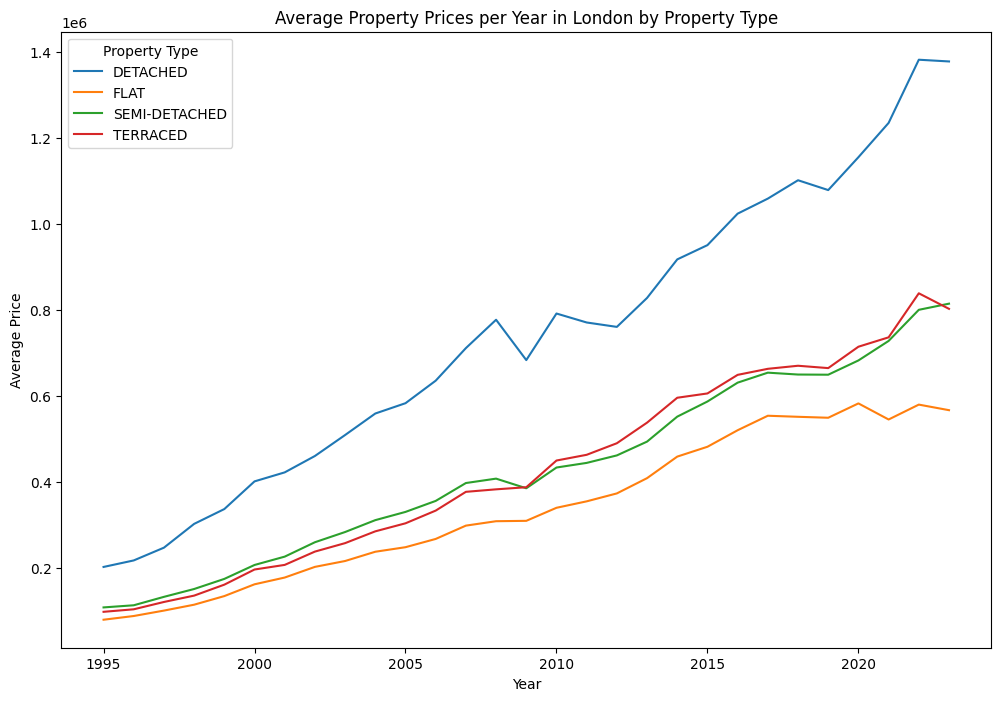

In [47]:
# Group by Year and Property_type, and calculate the average price for each group in London
property_average_price_per_year_type_london = residential_london.groupby(['Year', 'Property_type'])['Price'].mean().unstack()

# Plot the average price per year in London based on property type
plt.figure(figsize=(12, 8))
property_average_price_per_year_type_london.plot(kind='line', ax=plt.gca())
plt.title('Average Property Prices per Year in London by Property Type')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Property Type')
plt.show()

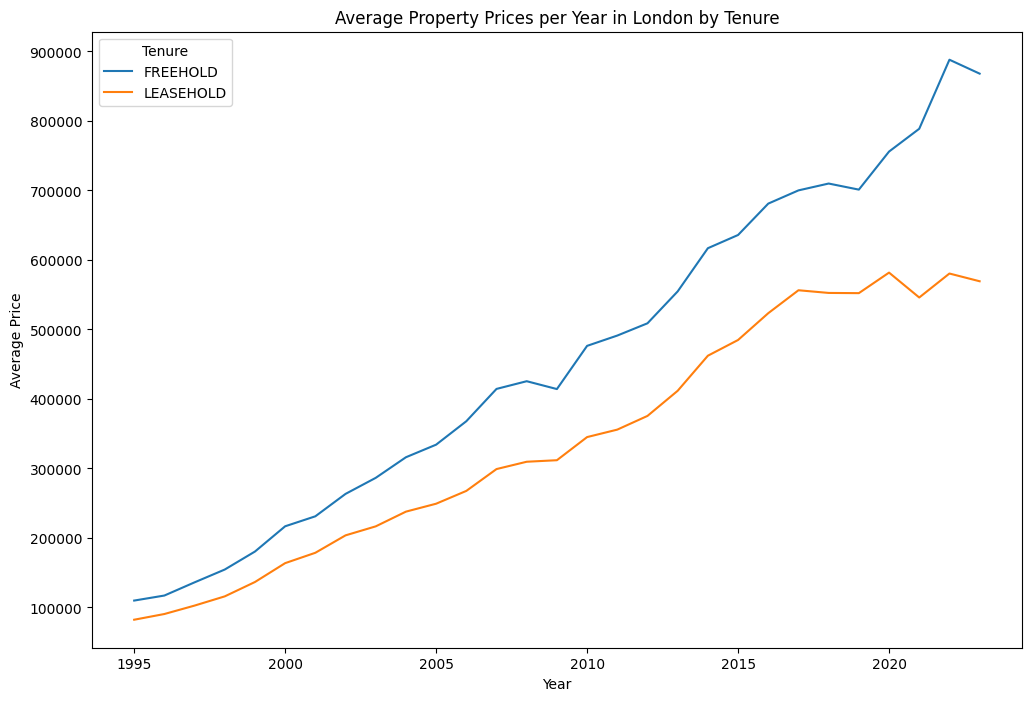

In [48]:
# Group by Year and Property_type, and calculate the average price for each group in London
tenure_average_price_per_year_type_london = residential_london.groupby(['Year', 'Tenure'])['Price'].mean().unstack()

# Plot the average price per year in London based on property type
plt.figure(figsize=(12, 8))
tenure_average_price_per_year_type_london.plot(kind='line', ax=plt.gca())
plt.title('Average Property Prices per Year in London by Tenure')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Tenure')
plt.show()

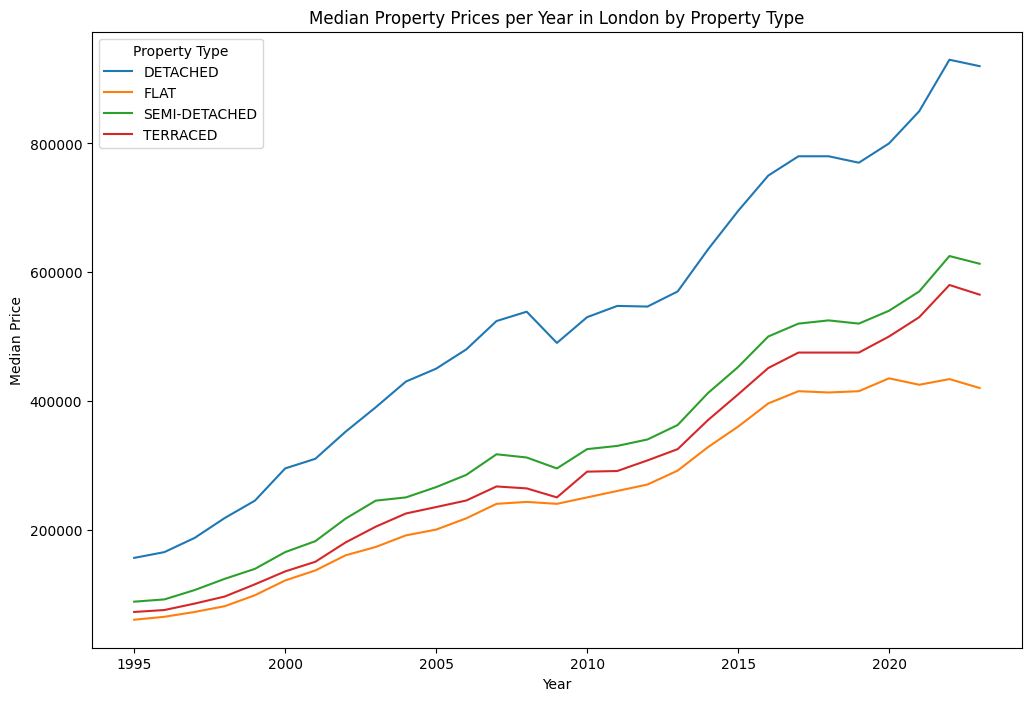

In [49]:
# Group by Year and Property_type, and calculate the average price for each group in London
property_median_price_per_year_type_london = residential_london.groupby(['Year', 'Property_type'])['Price'].median().unstack()

# Plot the average price per year in London based on property type
plt.figure(figsize=(12, 8))
property_median_price_per_year_type_london.plot(kind='line', ax=plt.gca())
plt.title('Median Property Prices per Year in London by Property Type')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.legend(title='Property Type')
plt.show()